# EDA для задачи предсказания результатов экзамена по математике.

Импорт необходимых библиотек:

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [98]:
study = pd.read_csv('stud_math.csv')
display(study.head(30))
study.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Удалим лишний столбец:

In [99]:
study.drop(['studytime, granular'], inplace=True, axis=1)

Изменим названия колонок:

In [100]:
study.columns = ['school', 'sex', 'age', 'address',
                 'famsize', 'pstatus', 'medu', 'fedu',
                 'mjob', 'fjob', 'reason', 'guardian',
                 'traveltime', 'studytime', 'failures',
                 'schoolsup', 'famsup', 'paid', 'activities',
                 'nursery', 'higher', 'internet', 'romantic',
                 'famrel', 'freetime', 'goout', 'health',
                 'absences', 'score']

In [101]:
study.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# 1. Школа, в которой учится ученик

In [102]:
pd.DataFrame(study.school.value_counts())

,school
GP,349
MS,46


В этом столбце нет пропусков

# 2. Пол ученика

In [103]:
pd.DataFrame(study.sex.value_counts())

,sex
F,208
M,187


В этом столбце тоже нет пропусков

# 3. Возраст ученика

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

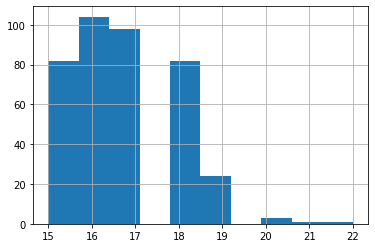

In [104]:
study.age.hist()
study.age.describe()

В этом столбце нет ни пропусков, ни выбросов

# 4. Тип адреса ученика ('U' - городской, 'R' - за городом)

In [105]:
pd.DataFrame(study.address.value_counts())

,address
U,295
R,83


В этом столбце есть пропуски. Заполним их модой:

In [106]:
study.address = study.address.fillna('U')
study.address.describe()

count     395
unique      2
top         U
freq      312
Name: address, dtype: object

# 5. Размер семьи

In [107]:
pd.DataFrame(study.famsize.value_counts())

,famsize
GT3,261
LE3,107


В этом столбце есть пропуски. Заполним их модой:

In [108]:
study.famsize = study.famsize.fillna('GT3')
study.famsize.describe()

count     395
unique      2
top       GT3
freq      288
Name: famsize, dtype: object

# 6. Статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [109]:
pd.DataFrame(study.pstatus.value_counts())

,pstatus
T,314
A,36


В этом столбце есть пропуски. Заполним их модой:

In [110]:
study.pstatus = study.pstatus.fillna('T')
study.pstatus.describe()

count     395
unique      2
top         T
freq      359
Name: pstatus, dtype: object

# 7. Образование матери

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

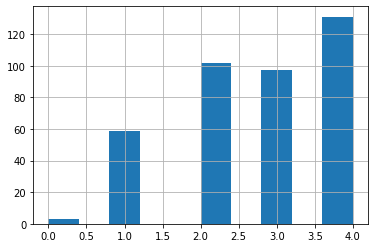

In [111]:
study.medu.hist()
study.medu.describe()

В этом столбце есть пропуски. Заполним их средним значением:

In [112]:
study.medu = study.medu.fillna(3)

По условию задачи в столбце должны быть целые числа:

In [113]:
study.medu = study.medu.apply(lambda x: int(x))

# 8. Образование отца

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

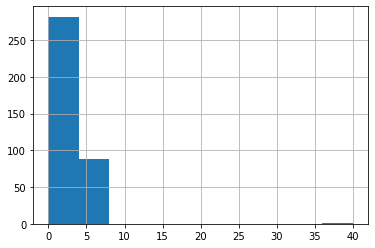

In [114]:
study.fedu.hist()
study.fedu.describe()

В столбце есть выбросы, т.к. по условию значения не должны превосходить 4. Оставим подходящие строки:

In [115]:
study = study.loc[study.fedu <= 4]

В этом столбце есть пропуски. Заполним их средним значением и заменим значения на целые:

In [116]:
study.fedu = study.fedu.fillna(2)
study.fedu = study.fedu.apply(lambda x: int(x))

count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

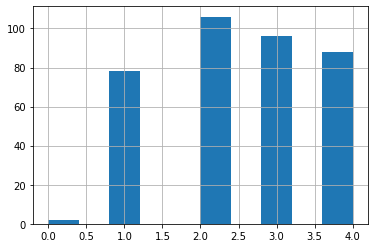

In [117]:
study.fedu.hist()
study.fedu.describe()

# 9. Работа матери

In [118]:
pd.DataFrame(study.mjob.value_counts())

,mjob
other,125
services,90
at_home,57
teacher,48
health,31


В этом столбце есть пропуски. Заполним их модой:

In [119]:
study.mjob = study.mjob.fillna('other')
study.mjob.describe()

count       370
unique        5
top       other
freq        144
Name: mjob, dtype: object

# 10. Работа отца

In [120]:
pd.DataFrame(study.fjob.value_counts())

,fjob
other,189
services,94
teacher,26
at_home,14
health,13


В этом столбце есть пропуски. Заполним их модой:

In [121]:
study.fjob = study.fjob.fillna('other')
study.fjob.describe()

count       370
unique        5
top       other
freq        223
Name: fjob, dtype: object

# 11. Причина выбора школы

In [122]:
pd.DataFrame(study.reason.value_counts())

,reason
course,128
reputation,98
home,96
other,32


В этом столбце есть пропуски. Заполним их модой:

In [123]:
study.reason = study.reason.fillna('course')
study.reason.describe()

count        370
unique         4
top       course
freq         144
Name: reason, dtype: object

# 12. Опекун

In [124]:
pd.DataFrame(study.guardian.value_counts())

,guardian
mother,236
father,78
other,26


В этом столбце есть пропуски. Заполним их модой:

In [125]:
study.guardian = study.guardian.fillna('mother')
study.guardian.describe()

count        370
unique         3
top       mother
freq         266
Name: guardian, dtype: object

# 13. Время в пути до школы

count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

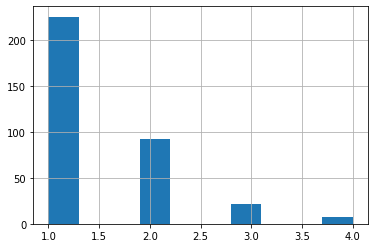

In [126]:
study.traveltime.hist()
study.traveltime.describe()

В этом столбце есть пропуски. Заполним их модой и заменим значения на целые:

In [127]:
study.traveltime = study.traveltime.fillna(1)
study.traveltime = study.traveltime.apply(lambda x: int(x))

count    370.000000
mean       1.418919
std        0.686824
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

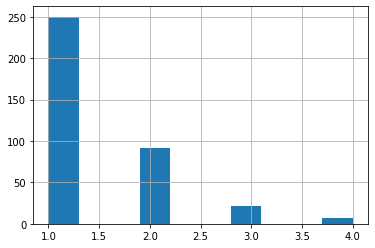

In [128]:
study.traveltime.hist()
study.traveltime.describe()

# 14. Время на учёбу помимо школы в неделю

count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

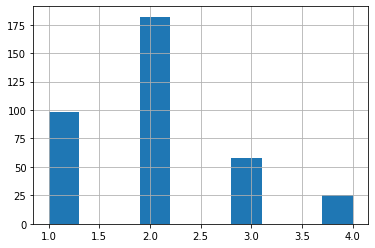

In [129]:
study.studytime.hist()
study.studytime.describe()

В этом столбце есть пропуски. Заполним их модой и заменим значения на целые:

In [130]:
study.studytime = study.studytime.fillna(2)
study.studytime = study.studytime.apply(lambda x: int(x))

count    370.000000
mean       2.027027
std        0.832487
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

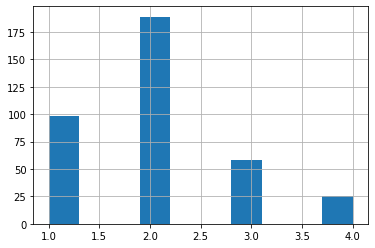

In [131]:
study.studytime.hist()
study.studytime.describe()

# 15. Количество внеучебных неудач

count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

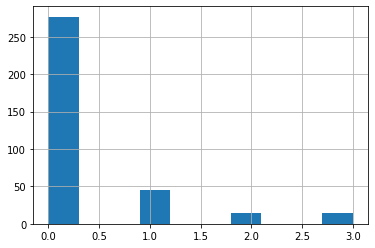

In [132]:
study.failures.hist()
study.failures.describe()

В этом столбце есть пропуски. Заполним их модой и заменим значения на целые:

In [133]:
study.failures = study.failures.fillna(0)
study.failures = study.failures.apply(lambda x: int(x))

count    370.000000
mean       0.318919
std        0.733199
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

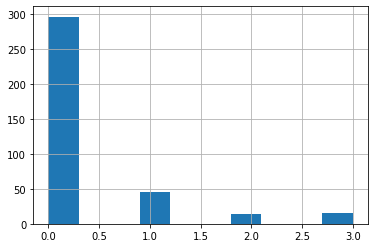

In [134]:
study.failures.hist()
study.failures.describe()

# 16. Дополнительная образовательная поддержка

In [135]:
pd.DataFrame(study.schoolsup.value_counts())

,schoolsup
no,314
yes,47


В этом столбце есть пропуски. Заполним их модой:

In [136]:
study.schoolsup = study.schoolsup.fillna('no')
study.schoolsup.describe()

count     370
unique      2
top        no
freq      323
Name: schoolsup, dtype: object

# 17. Семейная образовательная поддержка

In [137]:
pd.DataFrame(study.famsup.value_counts())

,famsup
yes,204
no,131


В этом столбце есть пропуски. Заполним их модой:

In [138]:
study.famsup = study.famsup.fillna('yes')
study.famsup.describe()

count     370
unique      2
top       yes
freq      239
Name: famsup, dtype: object

# 18. Дополнительные внеучебные занятия

In [139]:
pd.DataFrame(study.activities.value_counts())

,activities
yes,180
no,176


В этом столбце есть пропуски. Заполним их модой:

In [140]:
study.activities = study.activities.fillna('yes')
study.activities.describe()

count     370
unique      2
top       yes
freq      194
Name: activities, dtype: object

# 19. Дополнительные платные занятия по математике

In [141]:
pd.DataFrame(study.paid.value_counts())

,paid
no,188
yes,145


В этом столбце есть пропуски. Заполним их модой:

In [142]:
study.paid = study.paid.fillna('no')
study.paid.describe()

count     370
unique      2
top        no
freq      225
Name: paid, dtype: object

# 20. Посещал детский сад

In [143]:
pd.DataFrame(study.nursery.value_counts())

,nursery
yes,279
no,75


В этом столбце есть пропуски. Заполним их модой:

In [144]:
study.nursery = study.nursery.fillna('yes')
study.nursery.describe()

count     370
unique      2
top       yes
freq      295
Name: nursery, dtype: object

# 21. Хочет получить высшее образование

In [145]:
pd.DataFrame(study.higher.value_counts())

,higher
yes,333
no,19


В этом столбце есть пропуски. Заполним их модой:

In [146]:
study.higher = study.higher.fillna('yes')
study.higher.describe()

count     370
unique      2
top       yes
freq      351
Name: higher, dtype: object

# 22. Наличие интернета дома

In [147]:
pd.DataFrame(study.internet.value_counts())

,internet
yes,283
no,54


В этом столбце есть пропуски. Заполним их модой:

In [148]:
study.internet = study.internet.fillna('yes')
study.internet.describe()

count     370
unique      2
top       yes
freq      316
Name: internet, dtype: object

# 23. В романтических отношениях

In [149]:
pd.DataFrame(study.romantic.value_counts())

,romantic
no,226
yes,116


В этом столбце есть пропуски. Заполним их модой:

In [150]:
study.romantic = study.romantic.fillna('no')
study.romantic.describe()

count     370
unique      2
top        no
freq      254
Name: romantic, dtype: object

# 24. Семейные отношения

count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

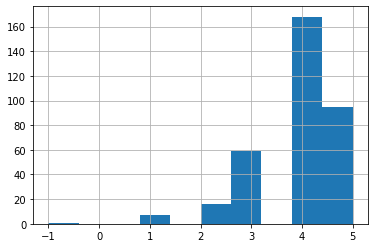

In [151]:
study.famrel.hist()
study.famrel.describe()

Есть пропуски, заменим их модой. Есть выбросы, заменим их минимальным значением в пределах нормы. Сделаем значения целыми:

In [152]:
study.famrel = study.famrel.fillna(4)
study.famrel = study.famrel.apply(lambda x: int(x))
study.famrel = study.famrel.apply(lambda x: 1 if x == -1 else x)

count    370.000000
mean       3.945946
std        0.884860
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

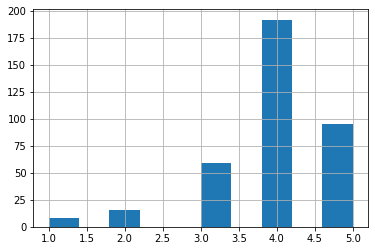

In [153]:
study.famrel.hist()
study.famrel.describe()

# 25. Свободное время после школы

count    361.000000
mean       3.218837
std        0.996817
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

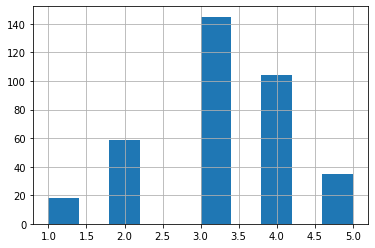

In [154]:
study.freetime.hist()
study.freetime.describe()

В этом столбце есть пропуски. Заполним их средним значением. Сделаем значения целыми:

In [155]:
study.freetime = study.freetime.fillna(3)
study.freetime = study.freetime.apply(lambda x: int(x))

count    370.000000
mean       3.213514
std        0.985164
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

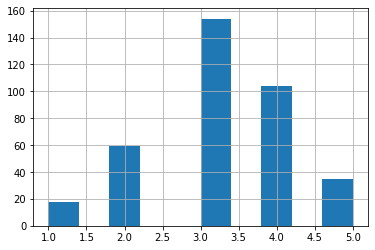

In [156]:
study.freetime.hist()
study.freetime.describe()

# 26. Проведение времени с друзьями

count    362.000000
mean       3.104972
std        1.111525
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

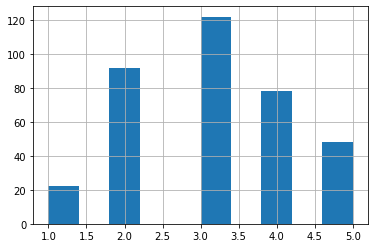

In [157]:
study.goout.hist()
study.goout.describe()

В этом столбце есть пропуски. Заполним их средним значением. Сделаем значения целыми:

In [158]:
study.goout = study.goout.fillna(3)
study.goout = study.goout.apply(lambda x: int(x))

count    370.000000
mean       3.102703
std        1.099516
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

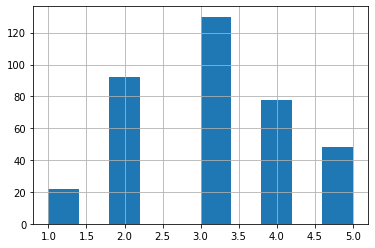

In [159]:
study.goout.hist()
study.goout.describe()

# 27. Текущее состояние здоровья

count    357.000000
mean       3.504202
std        1.401488
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

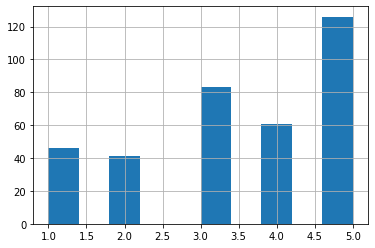

In [160]:
study.health.hist()
study.health.describe()

В этом столбце есть пропуски. Заполним их средним значением. Сделаем значения целыми:

In [161]:
study.health = study.health.fillna(3)
study.health = study.health.apply(lambda x: int(x))

count    370.000000
mean       3.486486
std        1.379714
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

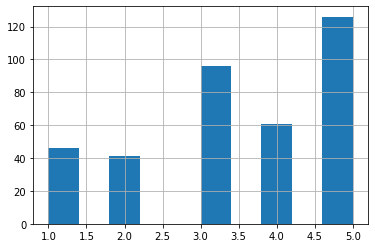

In [162]:
study.health.hist()
study.health.describe()

# 28. Количество пропущенных занятий

count    358.000000
mean       7.351955
std       24.202672
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

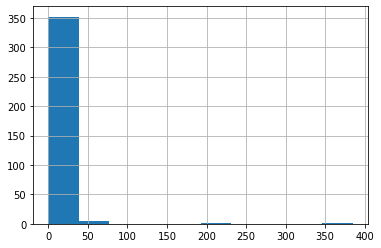

In [163]:
study.absences.hist()
study.absences.describe()

В этом столбце есть пропуски. Заполним их средним значением. Сделаем значения целыми:

In [164]:
study.absences = study.absences.fillna(7)
study.absences = study.absences.apply(lambda x: int(x))

count    370.000000
mean       7.340541
std       23.805962
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

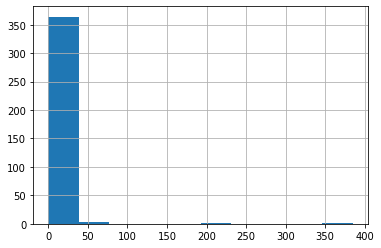

In [165]:
study.absences.hist()
study.absences.describe()

# 29. Баллы по госэкзамену по математике

count    364.000000
mean      52.252747
std       22.709250
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

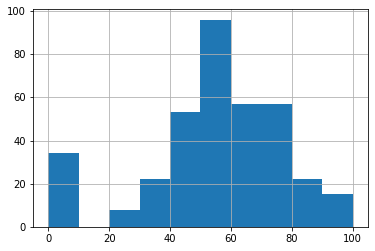

In [166]:
study.score.hist()
study.score.describe()

В этом столбце есть пропуски. Заполним их средним значением. Сделаем значения целыми:

In [167]:
study.score = study.score.fillna(52)
study.score = study.score.apply(lambda x: int(x))

count    370.000000
mean      52.248649
std       22.523888
min        0.000000
25%       41.250000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

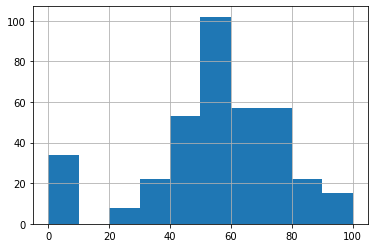

In [168]:
study.score.hist()
study.score.describe()

In [169]:
display(study.head(30))
study.info()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,yes,no,4,3,4,3,6,30
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,4,30
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,no,no,yes,yes,yes,no,4,3,2,3,10,50
3,GP,F,15,U,GT3,T,4,2,health,other,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,5,2,75
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,5,4,50
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,5,10,75
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,3,0,55
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,6,30
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,0,95
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,5,0,75


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      370 non-null    object
 1   sex         370 non-null    object
 2   age         370 non-null    int64 
 3   address     370 non-null    object
 4   famsize     370 non-null    object
 5   pstatus     370 non-null    object
 6   medu        370 non-null    int64 
 7   fedu        370 non-null    int64 
 8   mjob        370 non-null    object
 9   fjob        370 non-null    object
 10  reason      370 non-null    object
 11  guardian    370 non-null    object
 12  traveltime  370 non-null    int64 
 13  studytime   370 non-null    int64 
 14  failures    370 non-null    int64 
 15  schoolsup   370 non-null    object
 16  famsup      370 non-null    object
 17  paid        370 non-null    object
 18  activities  370 non-null    object
 19  nursery     370 non-null    object
 20  higher    

Построим графики зависимости переменных:

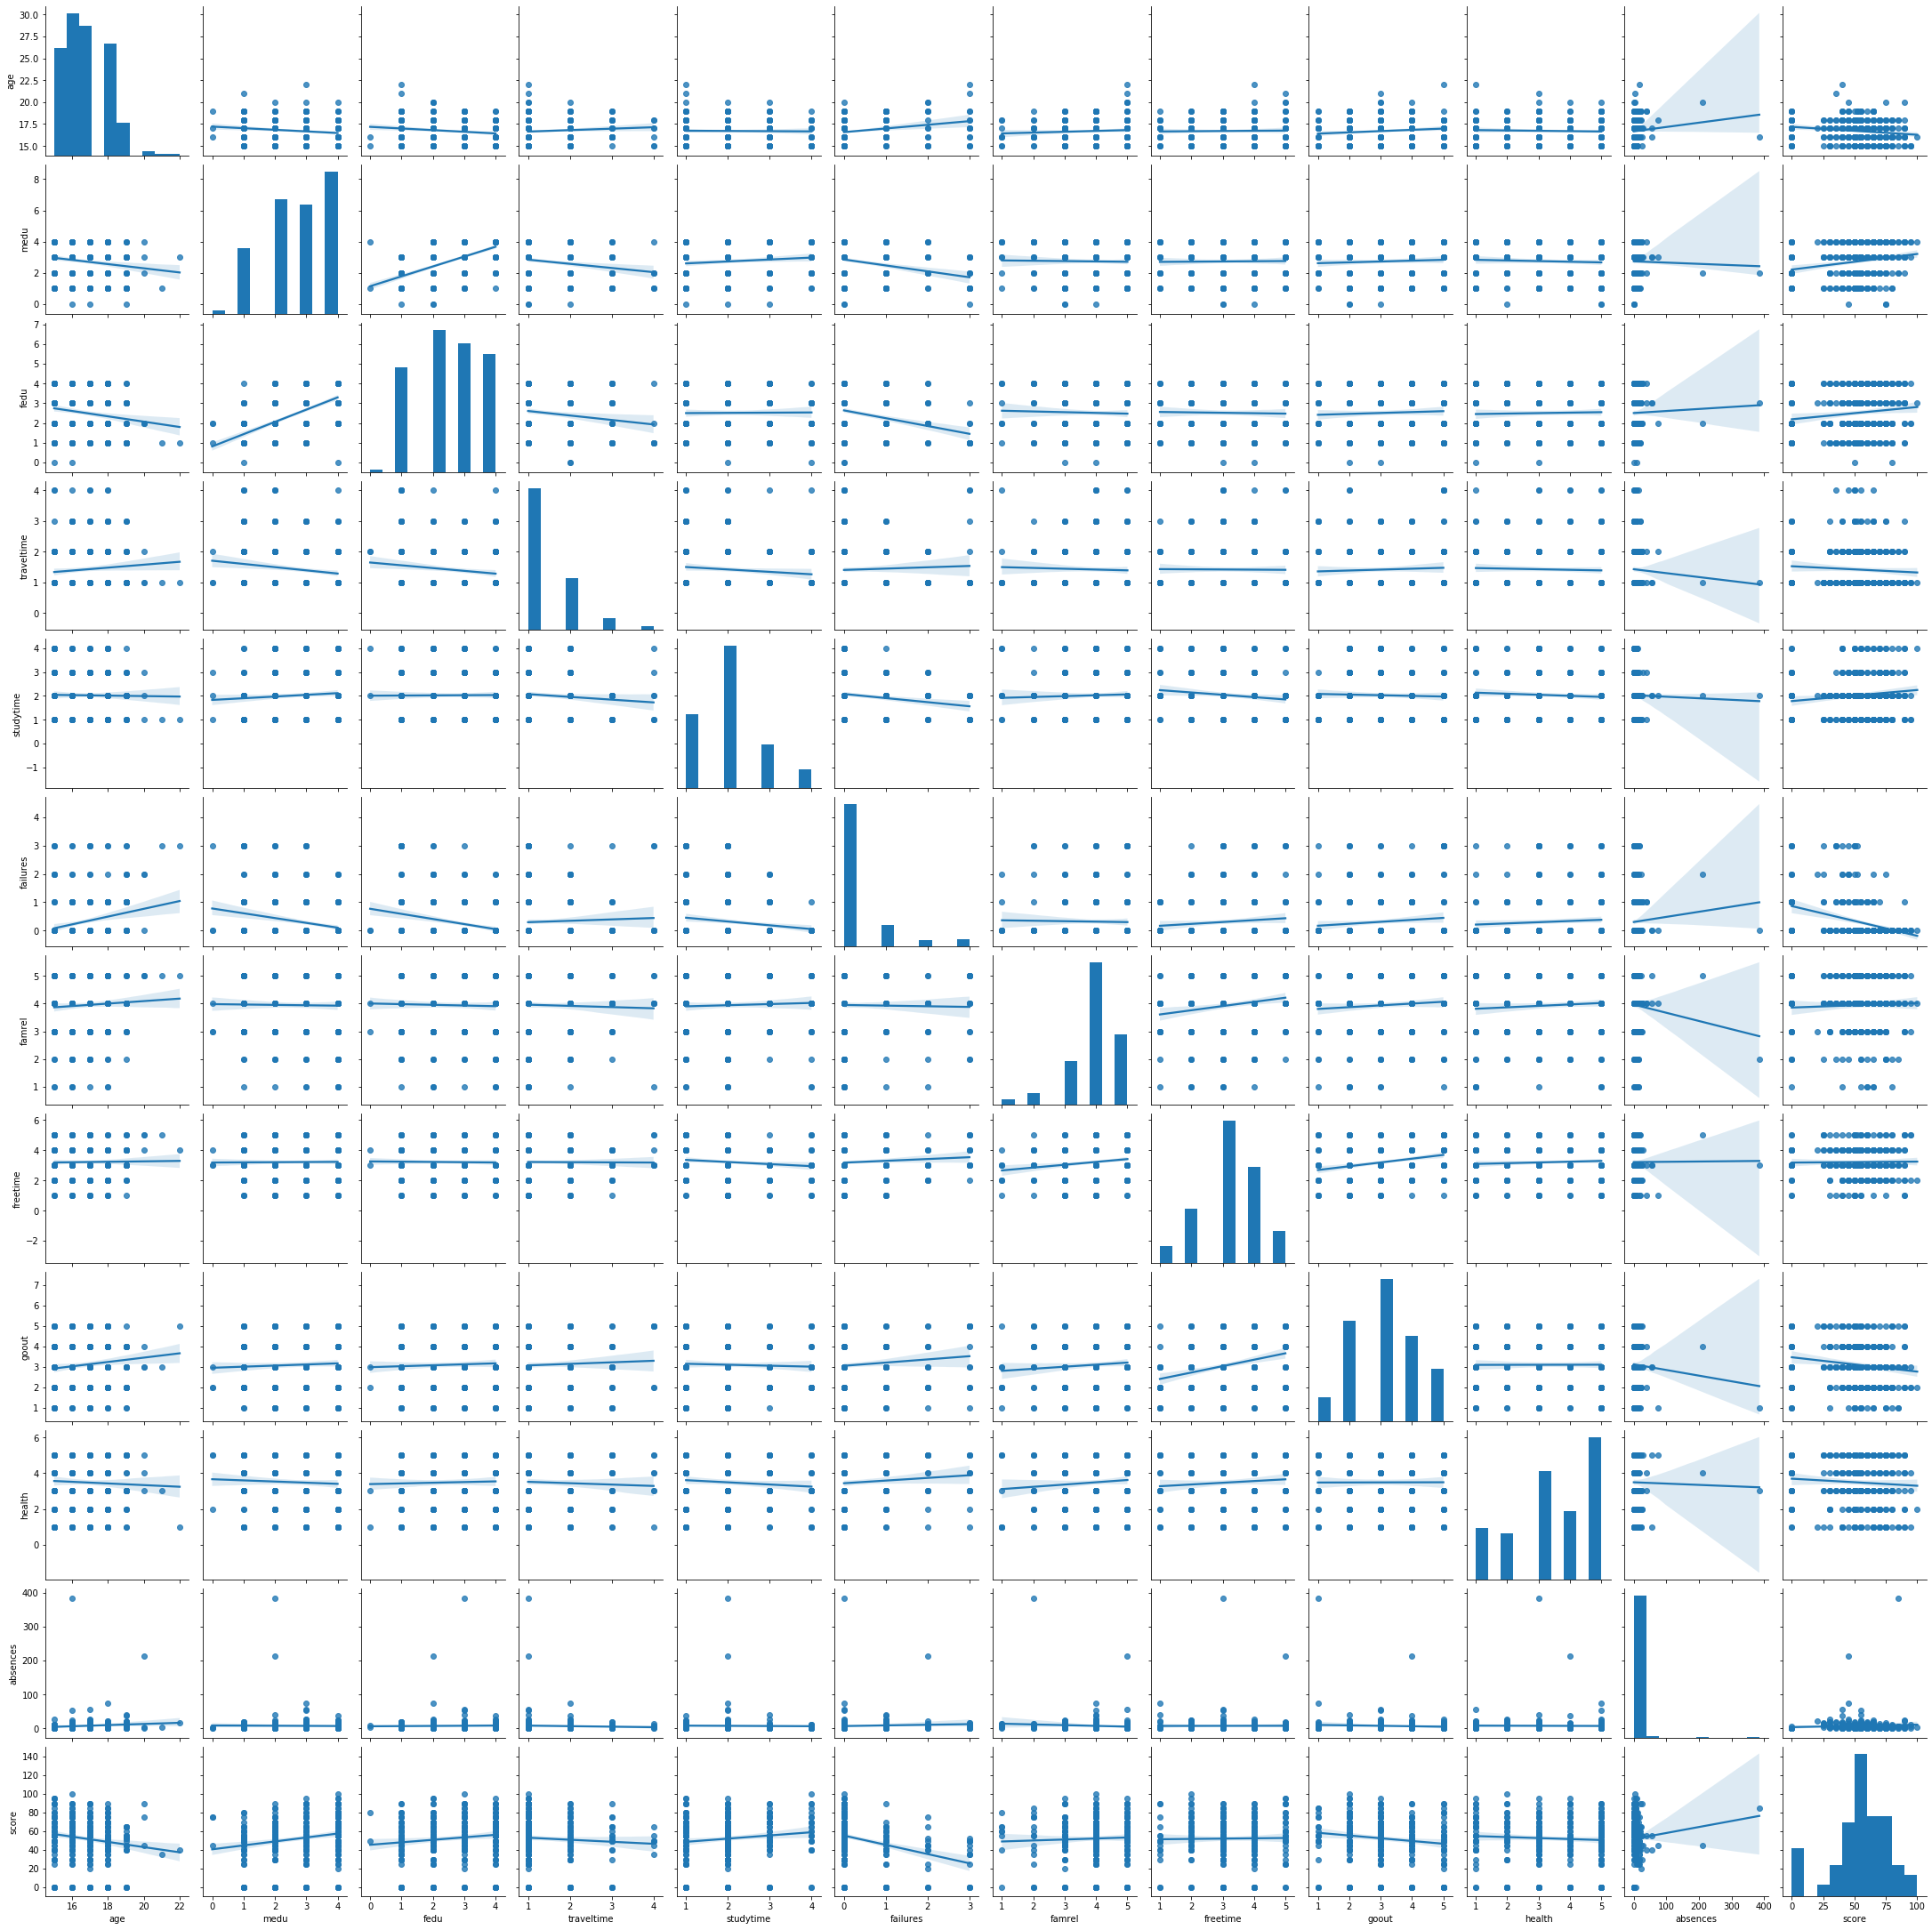

In [170]:
sns.pairplot(study, kind='reg')

Используем для наглядности матрицу корреляций:

In [171]:
study.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.156323,-0.159546,0.088745,-0.015515,0.239738,0.065040,0.018987,0.123065,-0.042831,0.091353,-0.158699
medu,-0.156323,1.000000,0.626861,-0.166859,0.093888,-0.253058,-0.017440,0.011819,0.053868,-0.051615,-0.017648,0.205445
fedu,-0.159546,0.626861,1.000000,-0.143654,0.008575,-0.267115,-0.030216,-0.019142,0.046430,0.029923,0.022536,0.128971
traveltime,0.088745,-0.166859,-0.143654,1.000000,-0.095691,0.046107,-0.033986,-0.008389,0.046943,-0.038337,-0.044384,-0.066663
studytime,-0.015515,0.093888,0.008575,-0.095691,1.000000,-0.151797,0.038778,-0.116099,-0.035608,-0.072823,-0.018653,0.126392
failures,0.239738,-0.253058,-0.267115,0.046107,-0.151797,1.000000,-0.019305,0.089314,0.103811,0.079282,0.058505,-0.322184
famrel,0.065040,-0.017440,-0.030216,-0.033986,0.038778,-0.019305,1.000000,0.168714,0.080929,0.081532,-0.079917,0.042012
freetime,0.018987,0.011819,-0.019142,-0.008389,-0.116099,0.089314,0.168714,1.000000,0.279925,0.068920,0.004749,0.014699
goout,0.123065,0.053868,0.046430,0.046943,-0.035608,0.103811,0.080929,0.279925,1.000000,0.002704,-0.059630,-0.143400
health,-0.042831,-0.051615,0.029923,-0.038337,-0.072823,0.079282,0.081532,0.068920,0.002704,1.000000,-0.012566,-0.064685


Все переменные слабоскоррелированны с итоговым баллом по математике

Посмотрим, различаются ли распределения балла за экзамен в зависимости от значения номинативных переменных:

In [172]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=study.loc[study.loc[:, column].isin(
                    study.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

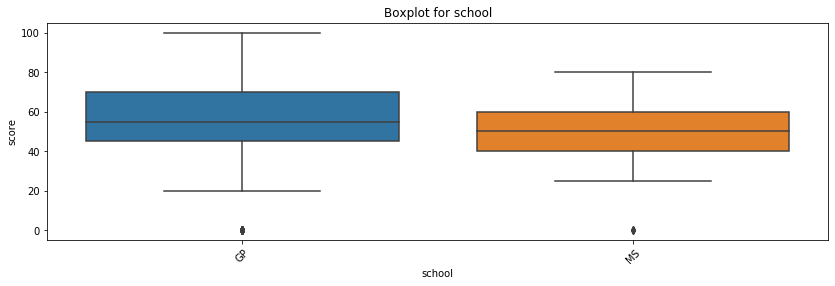

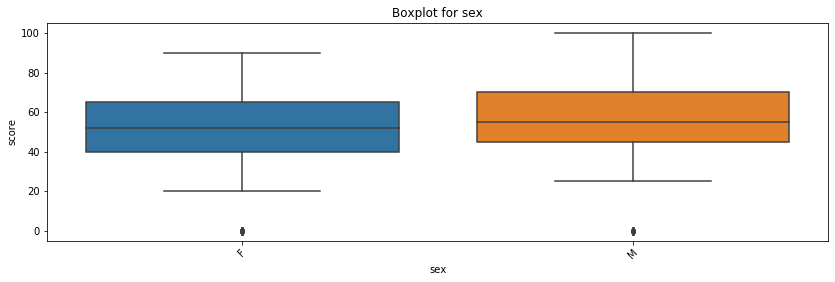

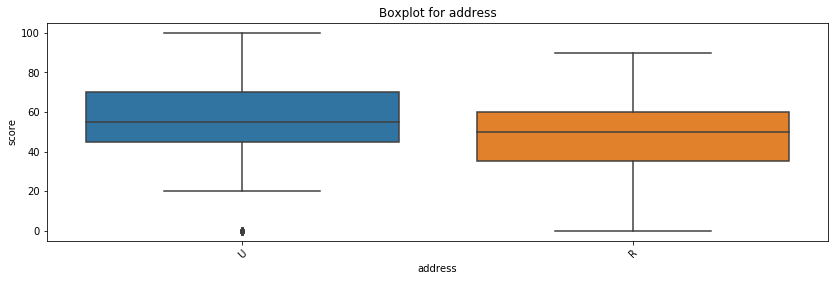

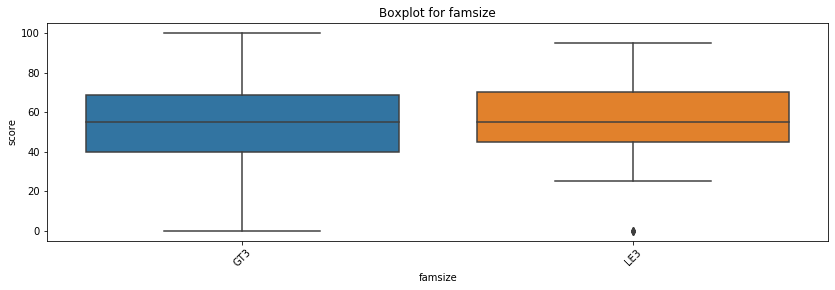

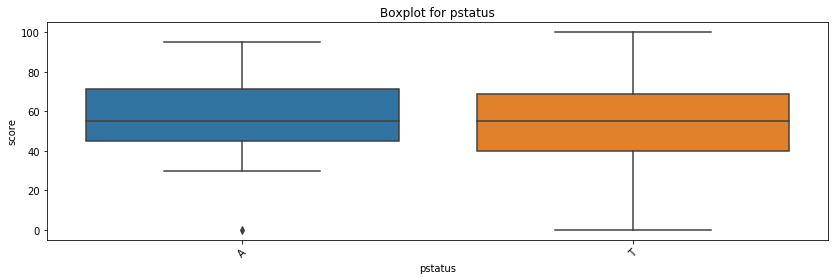

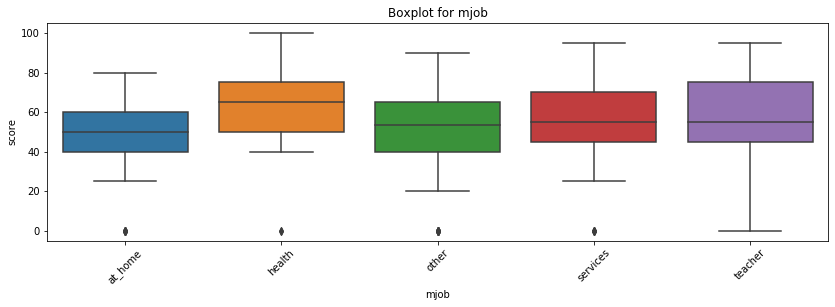

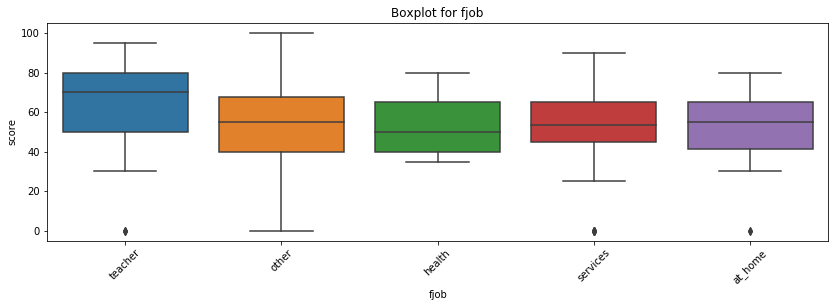

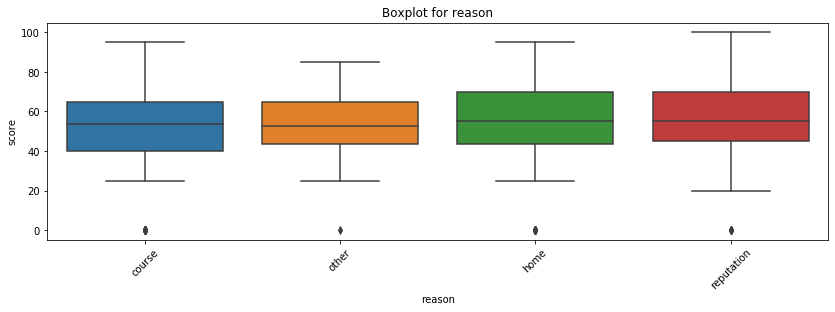

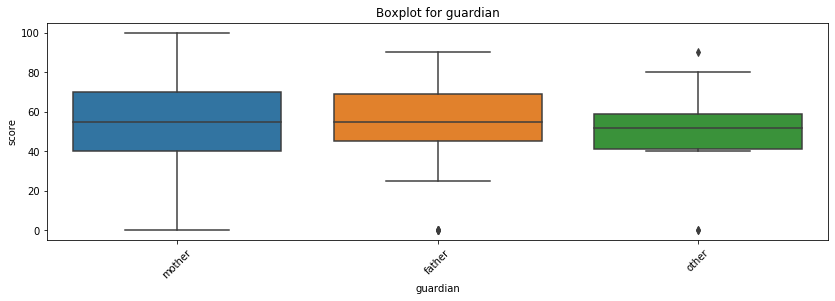

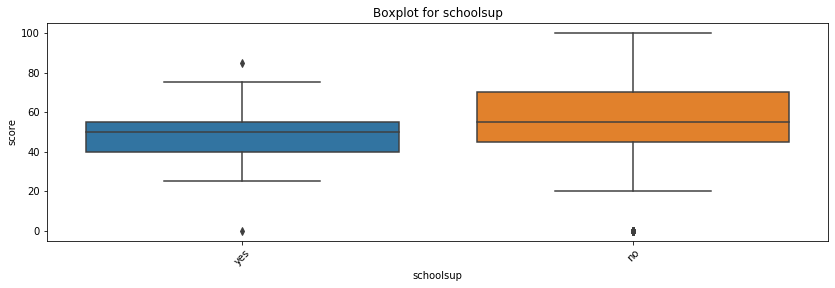

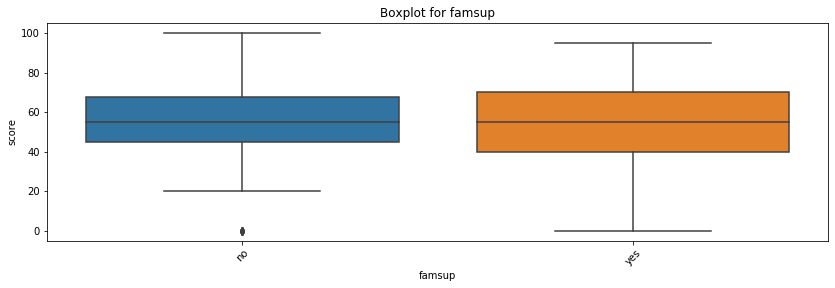

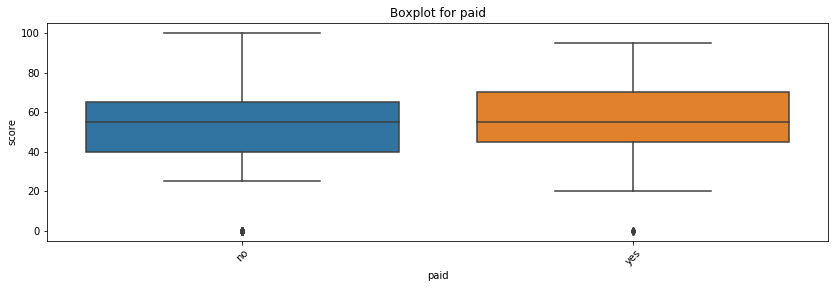

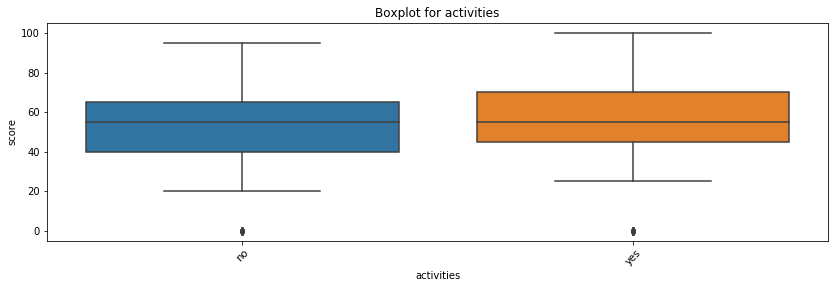

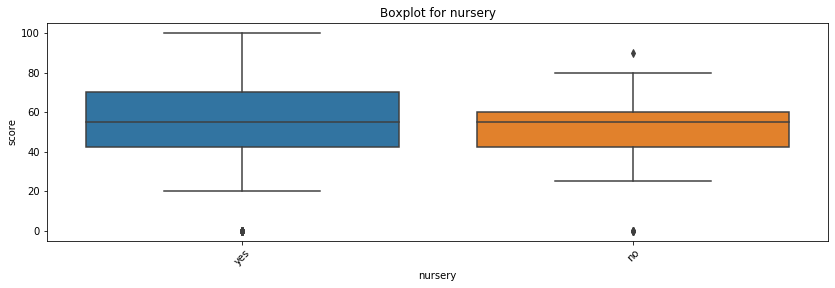

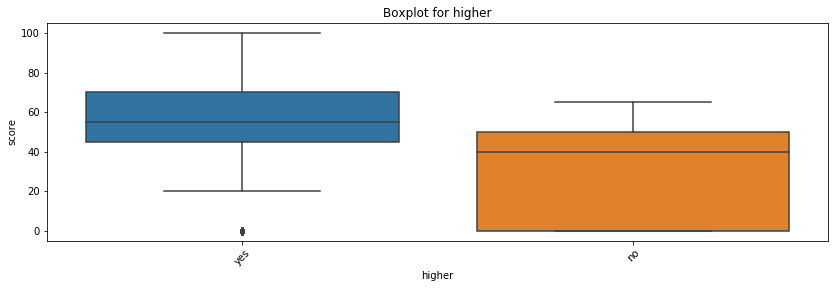

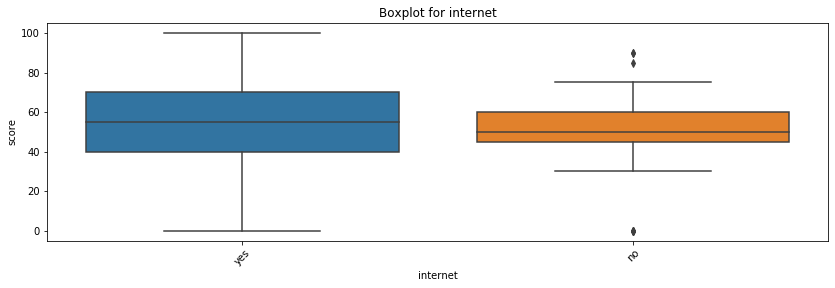

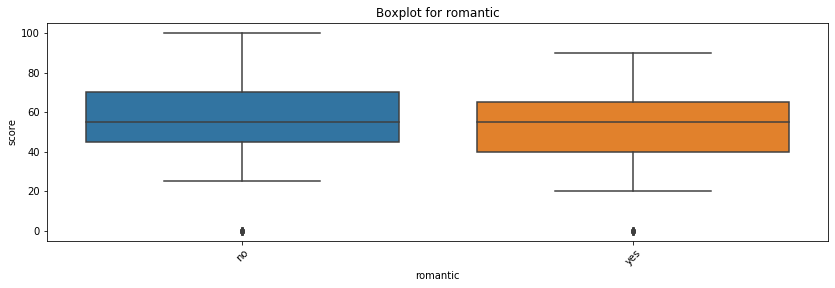

In [173]:
for col in ['school', 'sex', 'address',
            'famsize', 'pstatus',
            'mjob', 'fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении баллов по номинативным признакам с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов по математике по различным параметрам неразличимы:

In [174]:
def get_stat_dif(column):
    cols = study.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(study.loc[study.loc[:, column] == comb[0], 'score'],
                     study.loc[study.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [175]:
for col in ['school', 'sex', 'address',
            'famsize', 'pstatus',
            'mjob', 'fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются 5 параметров: address, mjob, paid, higher и romantic. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: address, mjob, paid, higher и romantic и все числовые переменные.

In [177]:
math_for_model = study.loc[:, ['address', 'mjob', 'paid', 'higher', 'romantic', 'age', 'medu', 'fedu',
                               'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences']]
math_for_model.head()

,address,mjob,paid,higher,romantic,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences
0,U,at_home,no,yes,no,18,4,4,2,2,0,4,3,4,3,6
1,U,at_home,no,yes,no,17,1,1,1,2,0,5,3,3,3,4
2,U,at_home,no,yes,no,15,1,1,1,2,3,4,3,2,3,10
3,U,health,yes,yes,yes,15,4,2,1,3,0,3,2,2,5,2
4,U,other,yes,yes,no,16,3,3,1,2,0,4,3,2,5,4


# Выводы:


1. В данных достаточно много пропусков, удаление привело бы к утере большей части данных, поэтому было использовано заполнение.
2. Выбросы найдены только в столбцах "Образование отца" и "Семейные отношения", что позволяет сделать вывод о том, что данные достаточно чистые.
3. Интересно, что коррелляция между образованием матери и баллом выше, чем между образованием отца и баллом по математике.
4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это address, mjob, paid, higher, romantic, age, medu, fedu, traveltime, studytime, failures, famrel, freetime, goout, health и absences